In [316]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
druggedMice_df = pd.read_csv(mouse_drug_data_to_load)
clinicalTrial_df = pd.read_csv(clinical_trial_data_to_load)
#clinicalTrial_df.head()
#Combine the data into a single dataset
combinedTrial_df = pd.merge(druggedMice_df, clinicalTrial_df,how='outer', on='Mouse ID')

#Display the data table for preview
combinedTrial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment
The Mean Tumor Volume Data Grouped by Drug and Timepoint 

In [317]:
results_g =  combinedTrial_df.groupby(['Drug', 'Timepoint'])
meanResults_df = results_g.mean()
meanTumorVol_df = meanResults_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})


# Preview DataFrame
meanTumorVol_df.head()

Mean Tumor Volume  Metastatic Sites
Drug      Timepoint                                     
Capomulin 0                  45.000000          0.000000
          5                  44.266086          0.160000
          10                 43.084291          0.320000
          15                 42.064317          0.375000
          20                 40.716325          0.652174

In [318]:

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standarderr = results_df.sem()["Tumor Volume (mm3)"]
#standarderr
# Convert to DataFrame
standarderr_df = pd.DataFrame(standarderr)
# Preview DataFrame
standarderr_df =  standarderr_df.reset_index()
standarderr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


### Re-Format the Data Frame
Index by Timepoint

In [319]:

# Minor Data Munging to Re-Format the Data Frames

tumor_pivot_df = meanTumorVol_df.pivot_table('Mean Tumor Volume', ['Timepoint'], columns= 'Drug')

# Preview that Reformatting worked

tumor_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


### Generate the Plot (with Error Bars) 


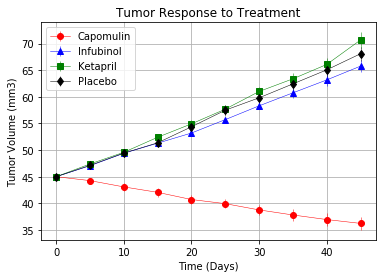

In [320]:
#get the figure and axis tuple for the subplots
fig, ax = plt.subplots()

# Get the timepoints for the x axis 
x_axis = tumor_pivot_df.index.values


#Found the following page to build the errorbars for each line graph
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.errorbar.html

# for each of the lines follow the pattern:

# 1) Add the plot for Capomulin on the line graph
y_axis = tumor_pivot_df["Capomulin"].values
# 2) Get the standard errors for each plot point of Capomulin  
standard_errors = standarderr_df[standarderr_df.Drug == 'Capomulin']['Tumor Volume (mm3)'].values
# 3) add the error bar on the line plot points add to show the standard deviation at each point  
ax.errorbar(x_axis, y_axis,yerr=standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid', linewidth=.5)

# Repeat for Infubinol
y_axis = tumor_pivot_df["Infubinol"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Infubinol']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="^", label='Infubinol', color='blue', linestyle='solid', linewidth=.5)

# Repeat for  Ketapril
y_axis = tumor_pivot_df["Ketapril"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Ketapril']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="s", label='Ketapril', color='green', linestyle='solid', linewidth=.5)

# Repeat for Placebo
y_axis = tumor_pivot_df["Placebo"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Placebo']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="d", label='Placebo', color='black', linestyle='solid', linewidth=.5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best')
plt.grid()
plt.savefig("Tumor-Response-to-Treatment.png")


## Metastatic Response to Treatment

In [302]:
metastatic_gb =  combinedTrial_df.groupby(['Drug', 'Timepoint'])
meanMetastatic_df = metastatic_gb.mean()
#Drop the Volume series
#meanMetastaticResults_df= meanMetastaticResults_df.drop(columns=['Tumor Volume (mm3)'])

# Preview DataFrame
meanMetastaticResults_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

### Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

In [304]:
metastatic_gb =  combinedTrial_df.groupby(['Drug', 'Timepoint'])
semMetastaticResults_df = metastatic_gb.sem()
#semMetastaticResults_df
#Drop the Volume series
semMetastaticResults_df= semMetastaticResults_df.drop(columns=['Tumor Volume (mm3)','Mouse ID'])

# Preview DataFrame
semMetastaticResults_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

### Minor Data Re-Formatting

In [305]:
# Minor Data Munging to Re-Format the Data Frames

tumor_pivot_df = meanTumorVol_df.pivot_table('Mean Tumor Volume', ['Timepoint'], columns= 'Drug')

# Preview that Reformatting worked

tumor_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


### Mean Metastatic Spread for Graph

In [257]:
# Pivot on mean metastatic sites
metastaticPivot_df = meanMetastaticResults_df.pivot_table('Metastatic Sites',['Timepoint'], columns='Drug')
# Preview that Reformatting worked
metastaticPivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


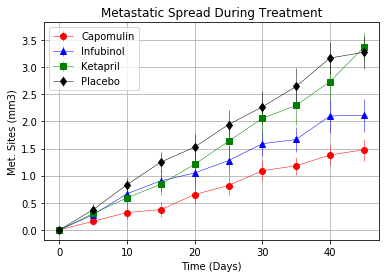

In [291]:
#metastaticPivot_df.head()

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standarderr = results_df.sem()["Metastatic Sites"]
#standarderr
# Convert to DataFrame
standarderr_df = pd.DataFrame(standarderr)
# Preview DataFrame
standarderr_df =  standarderr_df.reset_index()
#standarderr_df.head()


#get the figure and axis tuple for the subplots
fig, ax = plt.subplots()

# Get the timepoints for the x axis 
x_axis = metastaticPivot_df.index.values


#Found the following page to build the errorbars for each line graph
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.errorbar.html

# for each of the lines follow the pattern:

# 1) Add the plot for Capomulin on the line graph
y_axis = metastaticPivot_df["Capomulin"].values
# 2) Get the standard errors for each plot point of Capomulin  
standard_errors = standarderr_df[standarderr_df.Drug == 'Capomulin']['Metastatic Sites'].values
# 3) add the error bar on the line plot points add to show the standard deviation at each point  
ax.errorbar(x_axis, y_axis,yerr=standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid', linewidth=.5)

# Repeat for Infubinol
y_axis = metastaticPivot_df["Infubinol"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Infubinol']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="^", label='Infubinol', color='blue', linestyle='solid', linewidth=.5)

# Repeat for  Ketapril
y_axis = metastaticPivot_df["Ketapril"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Ketapril']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="s", label='Ketapril', color='green', linestyle='solid', linewidth=.5)

# Repeat for Placebo
y_axis = metastaticPivot_df["Placebo"].values
standard_errors = standarderr_df[standarderr_df.Drug == 'Placebo']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, yerr=standard_errors, fmt="d", label='Placebo', color='black', linestyle='solid', linewidth=.5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites (mm3)")
plt.legend(loc='best')
plt.grid()
plt.savefig("Metastatic-Spread-During-Treatment.png")

## Survival Rates
Count of Mice Grouped by Drug and Timepoint

In [259]:
#create separate dataframe with needed information
survivalRate_df = combinedTrial_df.loc[:, ["Drug","Timepoint", "Mouse ID"]]


#group by drug type and timepoint
survivalRate_df = survivalRate_df.groupby(["Drug", "Timepoint"], as_index=False).count()
survivalRate_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [260]:
# Minor Data Munging to Re-Format the Data Frames
survivalRatePivot_df = survivalRate_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
survivalRatePivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


### Plot of Survival Rate by Drug (Accounting for percentages)

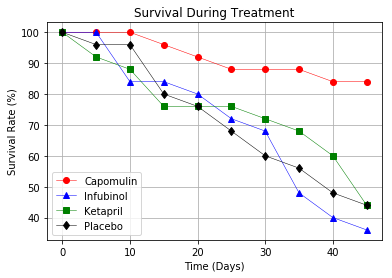

In [330]:
#get the figure and axis tuple for the subplots
fig, ax = plt.subplots()

# Get the timepoints for the x axis 
x_axis = survivalRatePivot_df.index.values


# for each of the lines follow the pattern:

# 1) Get the series of survival percentages at each timepoint index 
y_axis = (survivalRatePivot_df.Capomulin.values / survivalRatePivot_df.Capomulin.values[0]) * 100
# 2) Add the line plot for the drug 
plt.plot(x_axis, y_axis, marker='o', label='Capomulin', color='red', linewidth=.5)

# Plot Infubinol
y_axis = (survivalRatePivot_df.Infubinol.values / survivalRatePivot_df.Infubinol.values[0]) * 100
plt.plot(x_axis, y_axis, marker='^', label='Infubinol', color='blue', linewidth=.5)

# Plot Ketapril
y_axis = (survivalRatePivot_df.Ketapril.values / survivalRatePivot_df.Ketapril.values[0]) * 100
plt.plot(x_axis, y_axis, marker='s', label='Ketapril', color='green', linewidth=.5)

# Plot Placebo
y_axis = (survivalRatePivot_df.Placebo.values / survivalRatePivot_df.Placebo.values[0]) * 100
plt.plot(x_axis, y_axis, marker='d', label='Placebo', color='black', linewidth=.5)

# Labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='best')
plt.grid()
# Save the Figure
plt.savefig("Survival-Rate-During-Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph
calculate the percent changes for each drug

In [262]:
#https://stackoverflow.com/questions/47409559/how-to-obtain-the-percent-change-from-the-first-and-last-value-of-a-dataframe-in
#use iloc for first .iloc[0] and last .iloc[-1] to get pct_change 100*(last/first-1)
tumor_pivot_df = tumor_pivot_df[["Capomulin","Infubinol","Ketapril","Placebo"]]

#tumor_pivot_df
percentChange_s =  100* (tumor_pivot_df.iloc[-1]/tumor_pivot_df.iloc[0]-1)   
type(percentChange_s)
percentChange_df = pd.DataFrame({'Drug':percentChange_s.index, 'Change':percentChange_s.values})
percentChange_df

,Drug,Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


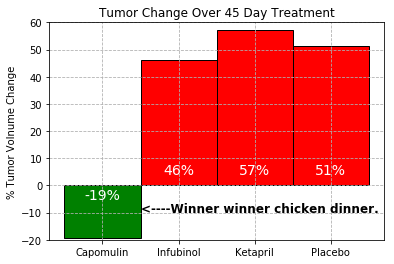

In [272]:
# Store all Relevant Percent Changes into a Tuple
tupleZipped= list(zip(percentChange_df.Drug, percentChange_df.Change))
tupleZipped = tuple(tupleZipped)
drugs_l = list(percentChange_df['Drug'])
#drugs_l
# Splice the data between passing and failing drugs
# Assuming list comprehension is a way to splice a list
percentChange_df['Result'] = ["g" if x < 0 else "r" for x in percentChange_df['Change']] 

#using function to ad the sub plot bars
def buildGraph(ax, percentChange_df):
    for index, row in percentChange_df.iterrows():
        ax.bar(index+0.5,  row['Change'], width=1, color= row['Result'], edgecolor = "black")
        ax.text(index+.5, 3 if row['Change'] > 0 else -6 , "{:.0%}".format(row['Change']/100) , ha='center', va='bottom', size=14, color="w")
    return ax

#Get the tuples for the sub plots
fig,ax = plt.subplots()
#add the lables 
plt.ylabel('% Tumor Volnume Change')
plt.title('Tumor Change Over 45 Day Treatment')

#Set up each axis
ax.set_xticks([.5, 1.5, 2.5, 3.5 ])
ax.set_xticklabels(list(percentChange_df['Drug']))
ax.set_ylim(-20, 60)
ax.grid(linestyle='--')

ax = buildGraph(ax, percentChange_df)
plt.text(1, -10, "<----Winner winner chicken dinner.", size=12, fontweight=800)
# Save the Figure
plt.savefig("Summary-Bar-Graph.png")

# Show the Figure
fig.show()